In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('measurement_datamart.csv') 

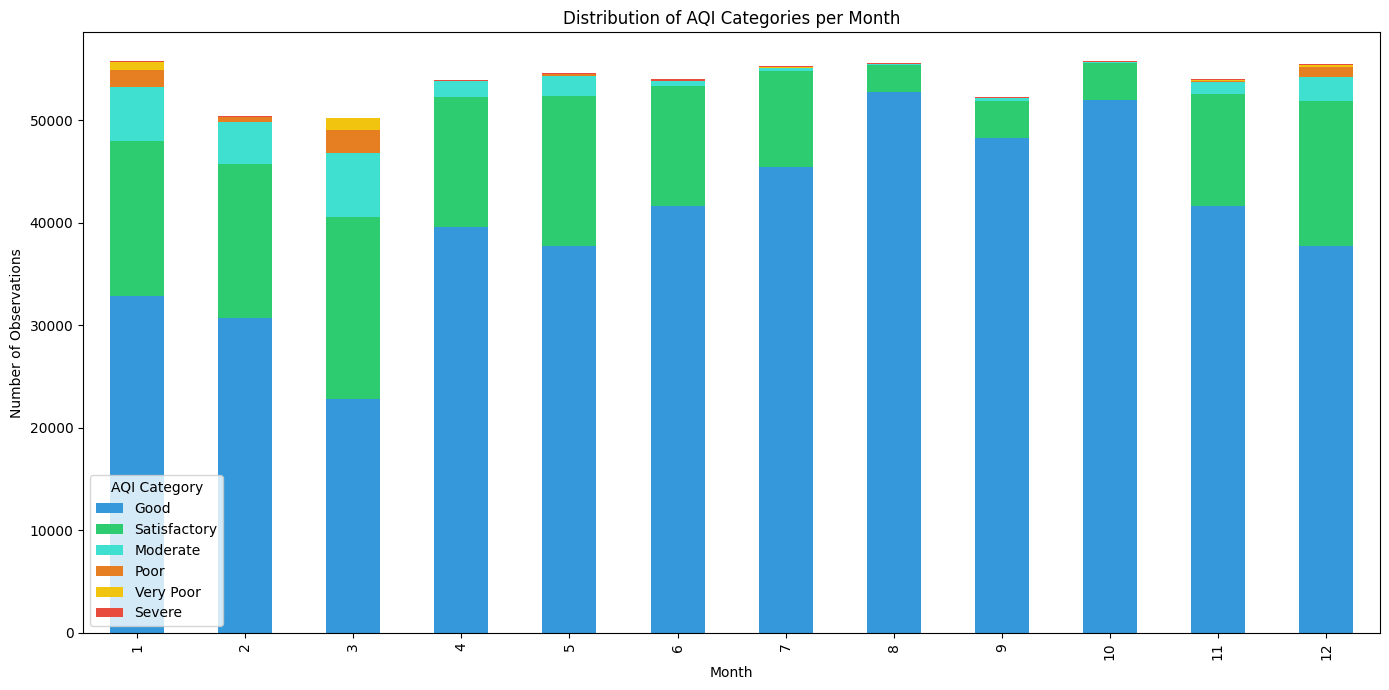

In [3]:
# konversi waktu
df['datetime'] = pd.to_datetime(df['Measurement_date'])
df['month'] = df['datetime'].dt.month

# pastikan urutan kategorinya sesuai
kategori_urut = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
aqi_month = df.groupby(['month', 'AQI_category']).size().unstack(fill_value=0)
aqi_month = aqi_month[kategori_urut]  # urutkan sesuai mapping

# definisikan warna sesuai kategori
colors = ['#3498DB', '#2ECC71', '#40E0D0', '#E67E22', '#F1C40F', '#E74C3C']

# membuat plot
aqi_month.plot(kind='bar', stacked=True, figsize=(14, 7), color=colors)
plt.title('Distribution of AQI Categories per Month')
plt.xlabel('Month')
plt.ylabel('Number of Observations')
plt.legend(title='AQI Category')
plt.tight_layout()
plt.show()


Pertengahan tahun (April–Oktober) menunjukkan kualitas udara yang jauh lebih baik, dengan dominasi kategori AQI "Good". Sebaliknya, awal dan akhir tahun (Januari–Maret dan November–Desember) mengalami penurunan kualitas udara, ditandai dengan peningkatan kategori "Moderate" hingga "Poor".
Faktor cuaca musiman, perubahan pola angin, dan aktivitas manusia kemungkinan besar memengaruhi pola ini.

Insigths: Strategi pengelolaan udara dan kampanye kesadaran publik sebaiknya difokuskan pada bulan-bulan dengan kualitas udara buruk, terutama di musim penghujan atau saat aktivitas polusi meningkat.

    Hour  count       mean  min     max
0      0  26891  42.467655 -1.7  1135.0
1      1  26916  41.522860 -1.7  1135.0
2      2  26941  41.553613 -1.7  1135.0
3      3  26916  40.484032 -1.7  1135.0
4      4  26941  40.806128 -1.7  1135.0
5      5  26991  40.089211 -1.7  1135.0
6      6  27041  40.780988 -1.7  1135.0
7      7  27038  40.513281 -1.7  1135.0
8      8  27045  42.055090 -1.7  1135.0
9      9  27033  42.228495 -1.7  1135.0
10    10  26974  43.562898 -1.7  1135.0
11    11  27025  43.318994 -1.7  1135.0
12    12  27000  43.329896 -1.7  1135.0
13    13  27000  41.964011 -1.7  1145.0
14    14  26950  42.156052 -1.7  1135.0
15    15  26975  41.632315 -1.7  1135.0
16    16  27000  43.877900 -1.7  6406.0
17    17  27000  42.860304 -1.7  1135.0
18    18  26949  41.876207 -1.7  1135.0
19    19  26999  43.785344 -1.7  1135.0
20    20  26999  44.395622 -1.7  1135.0
21    21  26955  52.819273 -1.7  1135.0
22    22  26991  48.255085 -1.7  1135.0
23    23  26941  45.899295 -1.7  1135.0


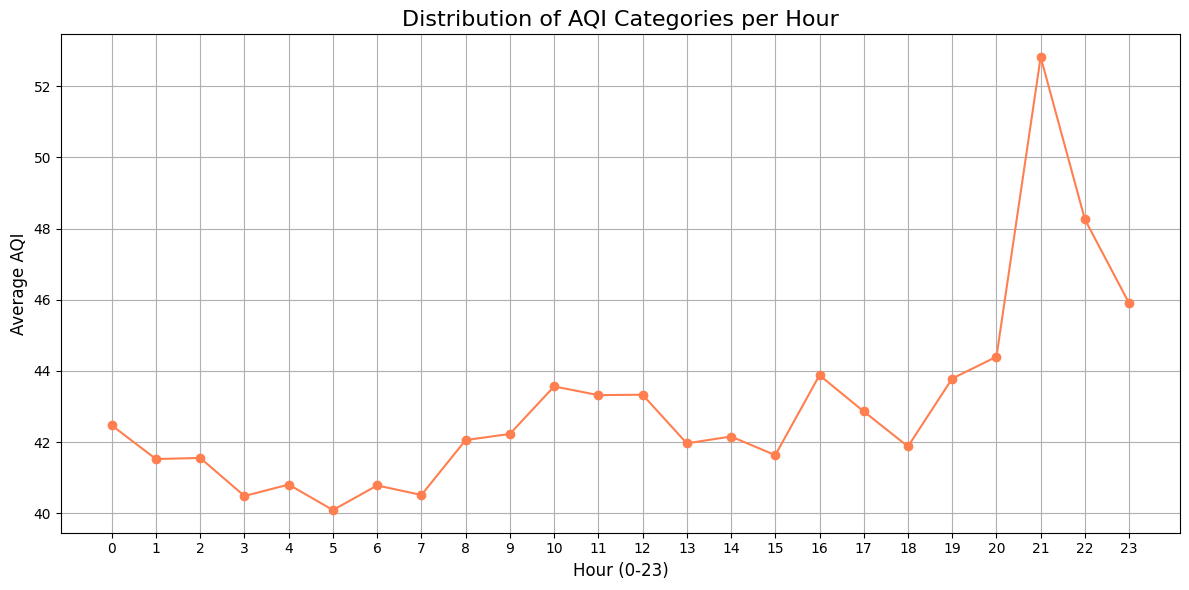

In [17]:
df['Measurement_date'] = pd.to_datetime(df['Measurement_date'])
df['Measurement_time'] = df['Measurement_time'].astype(str)

# menggabungkan tanggal dan waktu jadi satu kolom datetime
df['Measurement_datetime'] = pd.to_datetime(df['Measurement_date'].dt.date.astype(str) + ' ' + df['Measurement_time'])

# mengekstrak jam dari datetime
df['Hour'] = df['Measurement_datetime'].dt.hour

# menghitung distribusi statistik AQI per jam
aqi_per_hour = df.groupby('Hour')['AQI_index'].agg(['count', 'mean', 'min', 'max']).reset_index()
print(aqi_per_hour)

# visualisasi distribusi rata-rata AQI per jam
plt.figure(figsize=(12,6))
plt.plot(aqi_per_hour['Hour'], aqi_per_hour['mean'], marker='o', linestyle='-', color='coral')
plt.title('Distribution of AQI Categories per Hour', fontsize=16)
plt.xlabel('Hour (0-23)', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


AQI rata-rata terbaik terjadi saat dini hari hingga pagi (pukul 4–7), menjadikan waktu ini ideal untuk beraktivitas di luar.

Puncak polusi terjadi sekitar pukul 21:00, kemungkinan karena kombinasi aktivitas manusia seperti lalu lintas serta pembakaran rumah tangga, dan kondisi atmosfer yang menahan polutan di permukaan.

Insights: Perlu adanya pembatasan atau kontrol aktivitas yang berkontribusi terhadap polusi malam hari, seperti emisi kendaraan atau pembakaran terbuka. Waktu paparan publik terhadap udara luar juga bisa disesuaikan berdasarkan pola harian ini.